In [1]:
import sys
import os
sys.path.append(os.getcwd() + "\\..\\")

In [17]:
import model
import neural
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from typing import List
import pandas as pd
import json
import multiprocessing
import utils
%matplotlib inline

In [3]:
def make_dynamic_model(states):
    return model.LotkaVoltera(2/3, 4/3, 1, 1, states)

#Формируем модель и список начальных состояний
num_states = 50 #число начальных состояний
t_start = 0
t_stop = 10
value = np.around(np.linspace(0.05, 1, num_states), 3)
state = []
for i in value:
    for j in value:
        if i > j and i != 0:
            state.append((i, j))
state_train = state[0::2]
state_test = state[1::2]

m_train = make_dynamic_model(state_train)
m_test = make_dynamic_model(state_test)
#t = np.arange(t_start, t_stop, 0.1)
t = np.linspace(t_start, t_stop, 50)

#Формируем обучающую выборку
(X, Y) = model.make_train_of_model(m_train, t)
x_max = np.max(X, axis=0);
y_max = np.max(Y,  axis=0);
X = X/x_max
Y = Y/x_max
X.shape

#Формируем тестовую выборку
(X_test, Y_test) =model. make_train_of_model(m_test, t)
X_test = X_test/np.max(X_test, axis=0)
Y_test =  Y_test/np.max( Y_test,  axis=0)

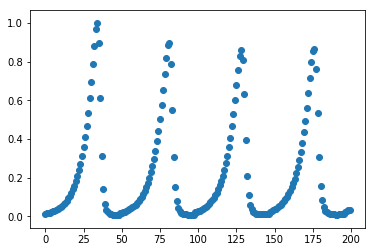

In [4]:
max_t = 200
plt.scatter([i for i in range(max_t)], X[0:max_t, 0])

In [5]:
def update_lr(epoche, lr):
    if epoche % 5 == 0:
        return lr*0.9
    return lr

In [6]:
ann = neural.ResNet((2,), 2, 64, 3, 2, keras.layers.LeakyReLU(), None)
ann = keras.Model(inputs=ann.inputs, outputs=ann.outputs)
lr_changer =  tf.keras.callbacks.LearningRateScheduler(update_lr, 1)
ann.compile(keras.optimizers.Adam(), loss="mse", metrics=['mae',neural.RelativeApproximationError()])
ann.summary()

W0130 20:40:33.031609  9724 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           192         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           4160        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
______________________________________________________________________________________________

In [7]:
h =ann.fit(X, Y, batch_size=32, epochs=100, 
             validation_data = [X_test, Y_test],  callbacks=[lr_changer])

Train on 30037 samples, validate on 29988 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 1/100
30037/30037 [==============================] - 1s 42us/sample - loss: 1.3015e-04 - mean_absolute_error: 0.0031 - RAE: 2.2783 - val_loss: 4.0746e-06 - val_mean_absolute_error: 0.0014 - val_RAE: 1.5705

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 2/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.1431e-06 - mean_absolute_error: 0.0011 - RAE: 1.3134 - val_loss: 5.5616e-06 - val_mean_absolute_error: 0.0016 - val_RAE: 1.1499

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009000000427477062.
Epoch 3/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.5202e-06 - mean_absolute_error: 0.0013 - RAE: 1.0961 - val_loss: 4.9272e-06 - val_mean_absolute_error: 0.0016 - val_RAE: 1.0512

Epoch 00004: LearningRateScheduler reducing learning rate 

30037/30037 [==============================] - 1s 36us/sample - loss: 1.0472e-06 - mean_absolute_error: 6.2403e-04 - RAE: 0.8582 - val_loss: 6.4822e-06 - val_mean_absolute_error: 0.0020 - val_RAE: 0.8597

Epoch 00029: LearningRateScheduler reducing learning rate to 0.0005314410664141178.
Epoch 29/100
30037/30037 [==============================] - 1s 37us/sample - loss: 7.6613e-07 - mean_absolute_error: 5.4433e-04 - RAE: 0.8514 - val_loss: 5.4948e-06 - val_mean_absolute_error: 0.0015 - val_RAE: 0.8467

Epoch 00030: LearningRateScheduler reducing learning rate to 0.0005314410664141178.
Epoch 30/100
30037/30037 [==============================] - 1s 37us/sample - loss: 5.2788e-07 - mean_absolute_error: 4.9979e-04 - RAE: 0.8386 - val_loss: 6.2574e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.8361

Epoch 00031: LearningRateScheduler reducing learning rate to 0.00047829695977270604.
Epoch 31/100
30037/30037 [==============================] - 1s 37us/sample - loss: 4.9889e-07 - mean_absol

30037/30037 [==============================] - 1s 37us/sample - loss: 6.1952e-08 - mean_absolute_error: 1.7010e-04 - RAE: 0.5989 - val_loss: 5.6397e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.5993

Epoch 00083: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 83/100
30037/30037 [==============================] - 1s 38us/sample - loss: 8.2204e-08 - mean_absolute_error: 1.8186e-04 - RAE: 0.5965 - val_loss: 6.7197e-06 - val_mean_absolute_error: 0.0019 - val_RAE: 0.5977

Epoch 00084: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 84/100
30037/30037 [==============================] - 1s 38us/sample - loss: 4.7930e-08 - mean_absolute_error: 1.5442e-04 - RAE: 0.5948 - val_loss: 5.9183e-06 - val_mean_absolute_error: 0.0017 - val_RAE: 0.5952

Epoch 00085: LearningRateScheduler reducing learning rate to 0.00016677183157298714.
Epoch 85/100
30037/30037 [==============================] - 1s 38us/sample - loss: 4.6960e-08 - mean_abs

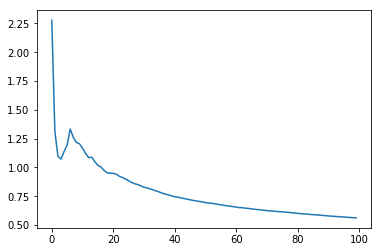

In [8]:
key = "RAE"
plt.plot([i for i in range(len(h.history[key]))], h.history[key])

In [23]:
begin = [0.5, 0.2]
mbegin =np.array([begin]) / x_max;
predict = [np.array(mbegin)]
time = 50
for i in range(time-1):
    predict.append(ann.predict(predict[-1]))
predict = np.stack(predict).reshape(-1, 2)

In [24]:
lv_model = make_dynamic_model([])

In [25]:
time_sequence = np.linspace(0, t_stop, time)
model_solve = integrate.odeint(lv_model, begin , time_sequence)
model_solve = model_solve/x_max

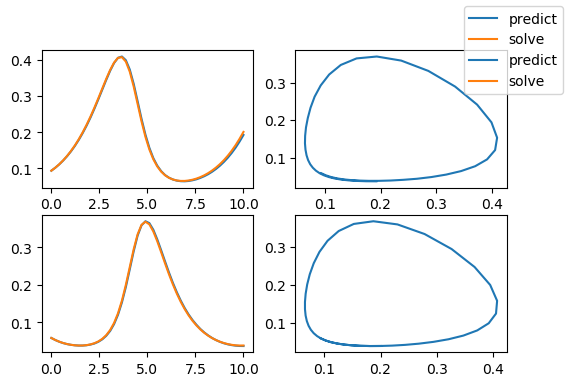

In [29]:
var = 0
fig, ax = plt.subplots(2, 2, dpi=100)
ax[0, 0].plot(time_sequence, predict[:, 0], label="predict")
ax[0, 0].plot(time_sequence, model_solve[:, 0], label="solve")
ax[1, 0].plot(time_sequence, predict[:, 1], label="predict")
ax[1, 0].plot(time_sequence, model_solve[:, 1], label="solve")
ax[0, 1].plot(predict[:, 0], predict[:, 1])
ax[1, 1].plot(model_solve[:, 0], model_solve[:, 1])
fig.legend()

In [31]:
ann.save_weights("./weights.chpt")

# Функции для сборки моделей


In [159]:
    class NeuralMaker:
        """Базовый класс для построения неросетевых моделей"""
        def __init__(self):
            self._isNext = True
        def isNext(self):
            return self._isNext
        def next(self) -> neural.Ann:
            raise NotImplementedError

    class ResNetPoperties:
        def __init__(self, shape_input, shape_output, nunits, nblocks, size, activation = "relu", regularization = None, callbacks = [], path = ""):
            self.shape_input = shape_input
            self.shape_output = shape_output
            self.nunits = nunits
            self.nblocks = nblocks
            self.size = size
            self.activation = activation
            self.regularization = regularization
            self.callbacks = callbacks
            self.path = path

    class ResNetMaker (NeuralMaker):
        """Построитель ИНС типа ResNet"""
        def __init__(self, props : List[ResNetPoperties]):
            self.props = props
            self.model_index = 0;

        def next(self, is_print = False):
            self.model_index = 0;
            for p in self.props:
                self.model_index = self.model_index + 1
                if is_print:
                    #utils.print_progress(self.model_index, len(self.props))
                    print("Model", self.model_index, "from", len(self.props))
                resnet = neural.ResNet(p.shape_input, p.shape_output, p.nunits, p.nblocks, p.size, p.activation, p.regularization)
                resnet = keras.Model(inputs=resnet.inputs, outputs=resnet.outputs)
                resnet.compile(keras.optimizers.Adam(), loss="mse", metrics=['mae',neural.RelativeApproximationError()])
                yield {"model": resnet, "props": p}

    

In [160]:
#Формирование моделей
def update_lr(epoche, lr):
    if epoche % 10 == 0:
        return lr*0.5
    return lr
lr_changer =  tf.keras.callbacks.LearningRateScheduler(update_lr, 0)
props = []
for nunits in [4, 8, 16, 32, 64, 128]:
    for nblocks in [1, 2, 3, 4, 5]:
        for blockSize in [2, 3, 4]:
            path = "./models/resnet_nunits.{nunits}_nblocks.{nblocks}_blockSize.{blocksize}_relu".format(nunits=nunits, nblocks=nblocks, blocksize=blockSize)
            try:
                os.makedirs(path)
            except:
                pass
            saver = keras.callbacks.ModelCheckpoint(
                filepath=path + "/resnet_epoch.{epoch}",
                save_weights_only=False,
                monitor='val_loss',
                mode='min',
                save_best_only=True)
            p = ResNetPoperties(
                2, 2,
                nunits,
                nblocks,
                blockSize,
                regularization = "l1",
                callbacks = [lr_changer, saver],
                path = path
            )
            props.append(p)
print("Props:", len(props))
maker = ResNetMaker(props)

Props: 90


In [20]:
for el in maker.next(True):
    pass

NameError: name 'sys' is not defined

In [ ]:
#обучение моделей и запись результатов в таблицу
#df_resnet = pd.DataFrame(columns=["epoches","nunits", "nblocks", "block_size", "mse", "mse_val", "rae", "rae_val", "mae", "mae_val"])
epochs = 10



# for model in maker.next(is_print=True):
#     history = model["model"].fit(X, Y, batch_size=32, epochs=epochs, 
#              validation_data = [X_test, Y_test],  verbose = 0, callbacks=model["props"].callbacks)
#     j = pd.DataFrame(history.history)
#     file = open(os.path.join(model["props"].path, "history.json"), "w")
#     file.write(j.to_json())
#     file.close()

def worker(p):
    print("Start process")
    resnet = neural.ResNet(p.shape_input, p.shape_output, p.nunits, p.nblocks, p.size, p.activation, p.regularization)
    resnet = keras.Model(inputs=resnet.inputs, outputs=resnet.outputs)
    resnet.compile(keras.optimizers.Adam(), loss="mse", metrics=['mae',neural.RelativeApproximationError()])
    
poll = multiprocessing.Pool(4)
poll.map(worker, props)

    

In [22]:
w = os.walk(props[0].path)
v = next(w)

In [57]:
#разбор ключей закодированных в названии файла
def params_parse(params_str: str):
    s = params_str.split("_")
    model_name = s[0]
    params = {"name": model_name}
    for i in range(1, len(s)):
        key_value = s[i].split(".")
        if len(key_value) == 2:
            params[key_value[0]] = int(key_value[1])
        elif len(key_value) == 1:
            params[key_value[0]] = None
        else:
            raise RuntimeError("Invalid value [" + key_value + "] of  struct [" + params_str + "]" )
        
    return params

def load_info(path):
    info = {"history": None, "params": [], "model": params_parse(path)}
    for path, dirs, files in os.walk(path):
        print("--", path)
        for file in files:
            if (file != "history.json"):
                info["params"].append(params_parse(file))
            else:
                print("----", os.path.join(path, file))
                f = open(os.path.join(path, file), "r")
                j = json.load(f)
                info["history"] = pd.DataFrame(j)
                f.close()
    return info

In [154]:
def model_info_load(path):
    info = load_info(path)
    for key in info["model"]:
        info["model"][key] = [info["model"][key]]
    max_epoch = -1

    for param in info["params"]:
        if param["epoch"] > max_epoch:
            max_epoch = param["epoch"]
    history = info["history"]
    row = history.iloc[[max_epoch-1]].copy()
    row["epoch"] = max_epoch
    
    for key in info["model"]:
        row[key] = info["model"][key]
    row["path"] = path
    return row

In [155]:
df = pd.DataFrame()
for prop in props:
    df = pd.concat([df, model_info_load(prop.path)])
df = df.reset_index()

-- ./models/resnet_nunits.4_nblocks.1_blockSize.2_relu
---- ./models/resnet_nunits.4_nblocks.1_blockSize.2_relu\history.json
-- ./models/resnet_nunits.4_nblocks.1_blockSize.3_relu
---- ./models/resnet_nunits.4_nblocks.1_blockSize.3_relu\history.json
-- ./models/resnet_nunits.4_nblocks.1_blockSize.4_relu
---- ./models/resnet_nunits.4_nblocks.1_blockSize.4_relu\history.json
-- ./models/resnet_nunits.4_nblocks.2_blockSize.2_relu
---- ./models/resnet_nunits.4_nblocks.2_blockSize.2_relu\history.json
-- ./models/resnet_nunits.4_nblocks.2_blockSize.3_relu
---- ./models/resnet_nunits.4_nblocks.2_blockSize.3_relu\history.json
-- ./models/resnet_nunits.4_nblocks.2_blockSize.4_relu
---- ./models/resnet_nunits.4_nblocks.2_blockSize.4_relu\history.json
-- ./models/resnet_nunits.4_nblocks.3_blockSize.2_relu
---- ./models/resnet_nunits.4_nblocks.3_blockSize.2_relu\history.json
-- ./models/resnet_nunits.4_nblocks.3_blockSize.3_relu
---- ./models/resnet_nunits.4_nblocks.3_blockSize.3_relu\history.json


-- ./models/resnet_nunits.64_nblocks.4_blockSize.3_relu
---- ./models/resnet_nunits.64_nblocks.4_blockSize.3_relu\history.json
-- ./models/resnet_nunits.64_nblocks.4_blockSize.4_relu
---- ./models/resnet_nunits.64_nblocks.4_blockSize.4_relu\history.json
-- ./models/resnet_nunits.64_nblocks.5_blockSize.2_relu
---- ./models/resnet_nunits.64_nblocks.5_blockSize.2_relu\history.json
-- ./models/resnet_nunits.64_nblocks.5_blockSize.3_relu
---- ./models/resnet_nunits.64_nblocks.5_blockSize.3_relu\history.json
-- ./models/resnet_nunits.64_nblocks.5_blockSize.4_relu
---- ./models/resnet_nunits.64_nblocks.5_blockSize.4_relu\history.json
-- ./models/resnet_nunits.128_nblocks.1_blockSize.2_relu
---- ./models/resnet_nunits.128_nblocks.1_blockSize.2_relu\history.json
-- ./models/resnet_nunits.128_nblocks.1_blockSize.3_relu
---- ./models/resnet_nunits.128_nblocks.1_blockSize.3_relu\history.json
-- ./models/resnet_nunits.128_nblocks.1_blockSize.4_relu
---- ./models/resnet_nunits.128_nblocks.1_blockSiz

In [156]:
df

,index,loss,mean_absolute_error,RAE,val_loss,val_mean_absolute_error,val_RAE,lr,epoch,name,nunits,nblocks,blockSize,relu,path
0,9,0.005723,0.042586,28.366840,0.006376,0.044808,28.184244,0.0005,10,./models/resnet,4,1,2,None,./models/resnet_nunits.4_nblocks.1_blockSize.2...
1,9,0.000974,0.008364,13.563723,0.000946,0.008073,13.171736,0.0005,10,./models/resnet,4,1,3,None,./models/resnet_nunits.4_nblocks.1_blockSize.3...
2,9,0.005468,0.042742,30.251741,0.006157,0.044513,29.922760,0.0005,10,./models/resnet,4,1,4,None,./models/resnet_nunits.4_nblocks.1_blockSize.4...
3,9,0.000593,0.007762,10.572292,0.000556,0.006500,10.297213,0.0005,10,./models/resnet,4,2,2,None,./models/resnet_nunits.4_nblocks.2_blockSize.2...
4,9,0.005423,0.043046,33.377811,0.006075,0.046534,33.125534,0.0005,10,./models/resnet,4,2,3,None,./models/resnet_nunits.4_nblocks.2_blockSize.3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,7,0.000538,0.008580,6.527694,0.000423,0.001807,6.211886,0.0005,8,./models/resnet,128,4,3,None,./models/resnet_nunits.128_nblocks.4_blockSize...
86,6,0.000479,0.007441,5.357556,0.000350,0.001399,5.087698,0.0005,7,./models/resnet,128,4,4,None,./models/resnet_nunits.128_nblocks.4_blockSize...
87,6,0.000476,0.007276,5.373487,0.000366,0.003102,5.140669,0.0005,7,./models/resnet,128,5,2,None,./models/resnet_nunits.128_nblocks.5_blockSize...
88,9,0.000487,0.007746,7.044007,0.000392,0.004747,6.892531,0.0005,10,./models/resnet,128,5,3,None,./models/resnet_nunits.128_nblocks.5_blockSize...


In [96]:
pd.DataFrame.from_dict(info["model"], "columns")

ValueError: If using all scalar values, you must pass an index

In [40]:
list({"rae": 1, "a": 4}.keys()) + ["b"] 

['rae', 'a', 'b']